# Implementing LSTMs using TensorFlow

The implementation of an LSTM model to classify news headlines as sarcastic or not_sarcastic. We will analyse the accuracy & loss curves for training and validation sets.

In [2]:
##import the required libraries and APIs
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Downloading the Headlines data


In [4]:
!wget --no-check-certificate \
https://storage.googleapis.com/wdd-2-node.appspot.com/x1.json \
-o /tmp/headlines.json

In [6]:
import pandas as pd

data = pd.read_json('./x1.json')
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [7]:
##create arrays to store the headlines and labels
headlines = data['headline'] 
labels = data['is_sarcastic']

## Data Preparation

In [37]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = 120
oov_token = '<OOV>'
padding_type = 'post'
truncating_type = 'post'
embedding_dim = 32

training_percentage = 0.8
training_size = int(len(headlines) * training_percentage)

In [38]:
##training set from 0 to training size
training_sentences = headlines[0: training_size]
training_labels = labels[0: training_size]

##testing set from training size to the end
testing_sentences = headlines[training_size: ]
testing_labels = labels[training_size: ]


In [39]:
##train the tokenizer on training data
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Training Sequences and Padding
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

# Testing Sequences and padding
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [40]:
# conver to numpy arrays
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


## Define the LSTM model with the following layers:
1. Embedding layer
2. Add two bidirectional LSTM layers with 64 and 32 as number of outputs.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 32)           320000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 120, 128)         49664     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 412,465
Trainable params: 412,465
Non-tr

In [42]:
num_epochs = 10

history = model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels),
                    verbose=2)

Epoch 1/10
716/716 - 23s - loss: 0.3908 - accuracy: 0.8205 - val_loss: 0.8813 - val_accuracy: 0.4734 - 23s/epoch - 32ms/step
Epoch 2/10
716/716 - 15s - loss: 0.2065 - accuracy: 0.9169 - val_loss: 1.3988 - val_accuracy: 0.4734 - 15s/epoch - 21ms/step
Epoch 3/10
716/716 - 15s - loss: 0.1322 - accuracy: 0.9499 - val_loss: 1.6334 - val_accuracy: 0.4734 - 15s/epoch - 21ms/step
Epoch 4/10
716/716 - 15s - loss: 0.0858 - accuracy: 0.9695 - val_loss: 1.2101 - val_accuracy: 0.4734 - 15s/epoch - 21ms/step
Epoch 5/10
716/716 - 15s - loss: 0.0574 - accuracy: 0.9801 - val_loss: 0.8561 - val_accuracy: 0.4726 - 15s/epoch - 21ms/step
Epoch 6/10
716/716 - 15s - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.9046 - val_accuracy: 0.4865 - 15s/epoch - 21ms/step
Epoch 7/10
716/716 - 15s - loss: 0.0280 - accuracy: 0.9907 - val_loss: 1.0770 - val_accuracy: 0.7432 - 15s/epoch - 21ms/step
Epoch 8/10
716/716 - 15s - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.9985 - val_accuracy: 0.6723 - 15s/epoch - 21ms/step


## Visualize accuracy and loss

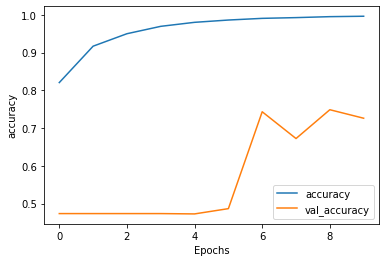

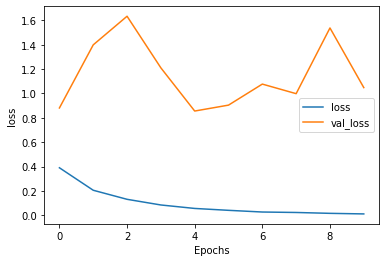

In [43]:
import matplotlib.pyplot as plt


def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()
  
plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

## Classifying unseen headlines

In [44]:
sentence = ["the girl starting to fear snakes in the garden might be real", "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

print(model.predict(padded))

[[6.6474568e-05]
 [2.5388296e-04]]
